## Импортирование необходимых библиотек

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
data = pd.read_csv("/content/drive/MyDrive/data/house_sales.csv")

In [69]:
data = data.drop('Id', 1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('MSSubClass', ('int64', 0)),
 ('MSZoning', ('object', 0)),
 ('LotFrontage', ('float64', 259)),
 ('LotArea', ('int64', 0)),
 ('Street', ('object', 0)),
 ('Alley', ('object', 1369)),
 ('LotShape', ('object', 0)),
 ('LandContour', ('object', 0)),
 ('Utilities', ('object', 0)),
 ('LotConfig', ('object', 0)),
 ('LandSlope', ('object', 0)),
 ('Neighborhood', ('object', 0)),
 ('Condition1', ('object', 0)),
 ('Condition2', ('object', 0)),
 ('BldgType', ('object', 0)),
 ('HouseStyle', ('object', 0)),
 ('OverallQual', ('int64', 0)),
 ('OverallCond', ('int64', 0)),
 ('YearBuilt', ('int64', 0)),
 ('YearRemodAdd', ('int64', 0)),
 ('RoofStyle', ('object', 0)),
 ('RoofMatl', ('object', 0)),
 ('Exterior1st', ('object', 0)),
 ('Exterior2nd', ('object', 0)),
 ('MasVnrType', ('object', 8)),
 ('MasVnrArea', ('float64', 8)),
 ('ExterQual', ('object', 0)),
 ('ExterCond', ('object', 0)),
 ('Foundation', ('object', 0)),
 ('BsmtQual', ('object', 37)),
 ('BsmtCond', ('object', 37)),
 ('BsmtExposure', ('object

## Устранение пропусков

In [34]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in data.columns]

[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.1773972602739726),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.9376712328767123),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.0),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', 0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('RoofStyle', 0.0),
 ('RoofMatl', 0.0),
 ('Exterior1st', 0.0),
 ('Exterior2nd', 0.0),
 ('MasVnrType', 0.005479452054794521),
 ('MasVnrArea', 0.005479452054794521),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('Foundation', 0.0),
 ('BsmtQual', 0.025342465753424658),
 ('BsmtCond', 0.025342465753424658),
 ('BsmtExposure', 0.026027397260273973),
 ('BsmtFinType1', 0.025342465753424658),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.026027397260273973),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('Heating', 0.0),
 ('HeatingQ

In [35]:
# Удаление колонок, содержащих пустые значения
data.dropna(axis=1, how='any')

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [36]:
# Удаление колонок, содержащих пустые значения
data.dropna(axis=1, how='any')

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [37]:
# Удаление колонок с высоким процентом пропусков (более 50%)
data.dropna(axis=1, thresh=730)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [38]:
# Заполним пропуски возраста средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'LotFrontage', data['LotFrontage'].mean())

In [41]:
# Убедимся, что признак LotFrontage не имеет пустых значений
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

## Кодирование категориальных признаков

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['SaleCondition'])

In [44]:
data['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [45]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5])

In [46]:
le.inverse_transform([0, 1, 2, 3, 4, 5])

array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
      dtype=object)

In [47]:
data['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [58]:
pip install category_encoders

     |████████████████████████████████| 86 kB 2.6 MB/s 


In [88]:
#CountEncoder
from category_encoders.count import CountEncoder as ce_CountEncoder

In [100]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['SaleType'])])

In [103]:
data_COUNT_ENC.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1369,3,1220,1311,953,706,0,...,208500,0,1454,8,856,1459,0,2003,2003,2008
1,1262,0,0,1369,3,1220,1311,134,978,0,...,181500,0,1454,6,1262,1459,298,1976,1976,2007
2,920,866,0,1369,3,1220,1311,114,486,0,...,223500,0,1454,6,920,1459,0,2001,2002,2008
3,961,756,0,1369,3,1220,65,953,216,0,...,140000,0,1454,7,756,1459,0,1915,1970,2006
4,1145,1053,0,1369,4,1220,1311,221,655,0,...,250000,0,1454,9,1145,1459,192,2000,2000,2008


In [104]:
data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [105]:
data_COUNT_ENC['MSZoning'].unique()

array([1151,  218,   10,   65,   16])

In [106]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['SaleType'])])

In [107]:
data_FREQ_ENC['MSZoning'].unique()

array([0.78835616, 0.14931507, 0.00684932, 0.04452055, 0.0109589 ])

In [117]:
from category_encoders.helmert import HelmertEncoder as ce_HelmertEncoder

In [118]:
#HelmetEncoder
ce_HelmertEncoder1 = ce_HelmertEncoder()
data_HELM_ENC = ce_HelmertEncoder1.fit_transform(data[data.columns.difference(['SaleType'])], data['SaleType'])

In [119]:
data_HELM_ENC.head()

,intercept,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_0,Alley_1,BedroomAbvGr,BldgType_0,BldgType_1,BldgType_2,...,SalePrice,ScreenPorch,Street_0,TotRmsAbvGrd,TotalBsmtSF,Utilities_0,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1,856,854,0,-1.0,-1.0,3,-1.0,-1.0,-1.0,...,208500,0,-1.0,8,856,-1.0,0,2003,2003,2008
1,1,1262,0,0,-1.0,-1.0,3,-1.0,-1.0,-1.0,...,181500,0,-1.0,6,1262,-1.0,298,1976,1976,2007
2,1,920,866,0,-1.0,-1.0,3,-1.0,-1.0,-1.0,...,223500,0,-1.0,6,920,-1.0,0,2001,2002,2008
3,1,961,756,0,-1.0,-1.0,3,-1.0,-1.0,-1.0,...,140000,0,-1.0,7,756,-1.0,0,1915,1970,2006
4,1,1145,1053,0,-1.0,-1.0,4,-1.0,-1.0,-1.0,...,250000,0,-1.0,9,1145,-1.0,192,2000,2000,2008


## Нормализация числовых признаков

In [120]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

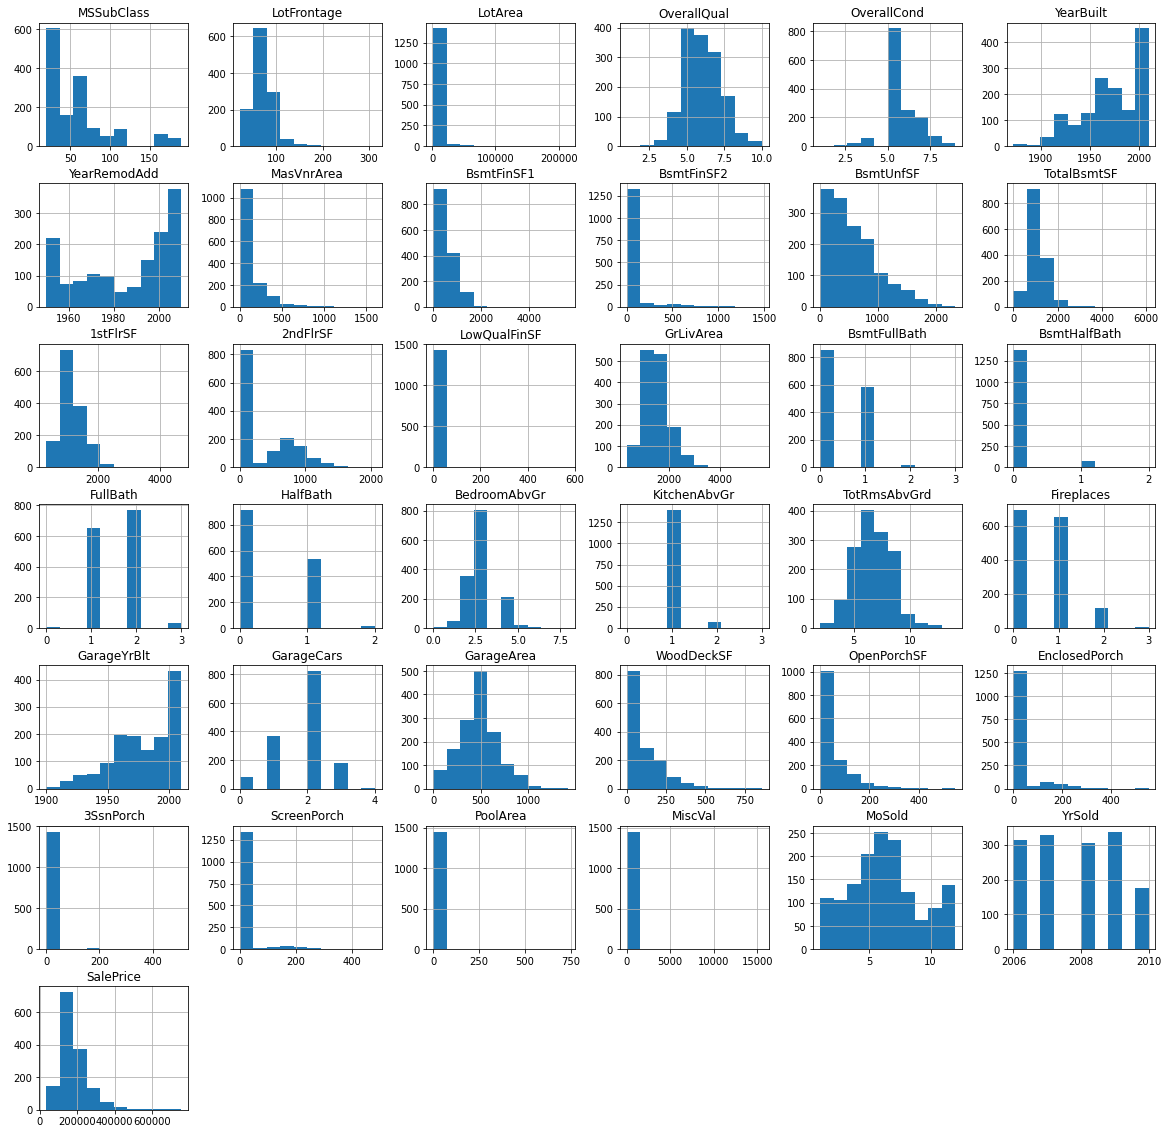

In [121]:
data.hist(figsize=(20,20))
plt.show()

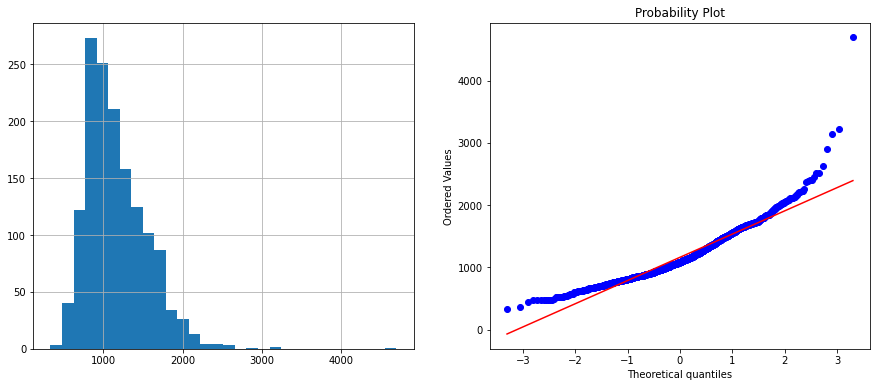

In [126]:
diagnostic_plots(data, '1stFlrSF')

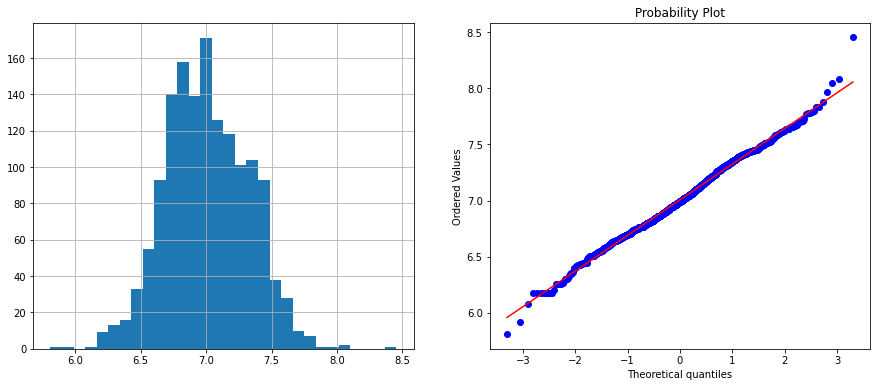

In [127]:
#Логарифмическое преобразование
data['1stFlrSF'] = np.log(data['1stFlrSF'])
diagnostic_plots(data, '1stFlrSF')

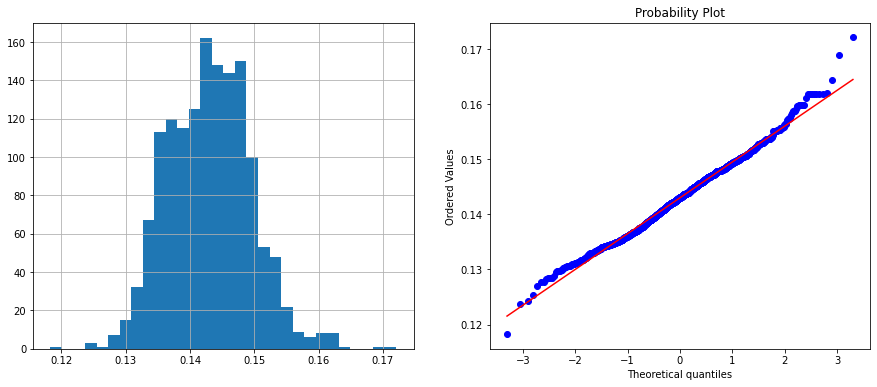

In [128]:
#Обратное преобразование
data['1stFlrSF_reciprocal'] = 1 / (data['1stFlrSF']) 
diagnostic_plots(data, '1stFlrSF_reciprocal')

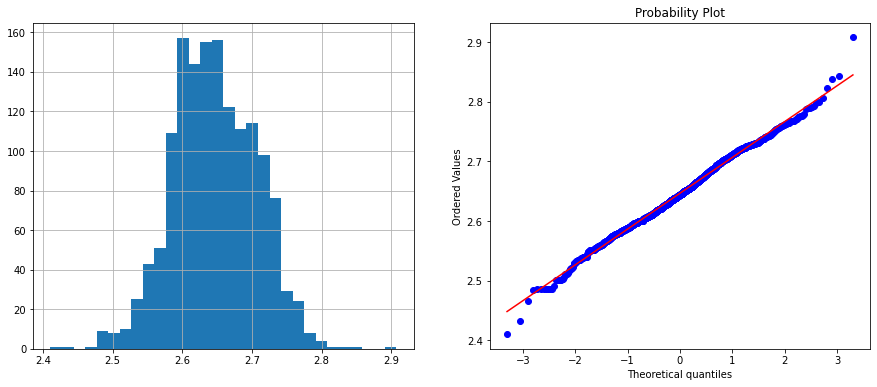

In [129]:
#Квадратный корень
data['1stFlrSF_sqr'] = data['1stFlrSF']**(1/2) 
diagnostic_plots(data, '1stFlrSF_sqr')

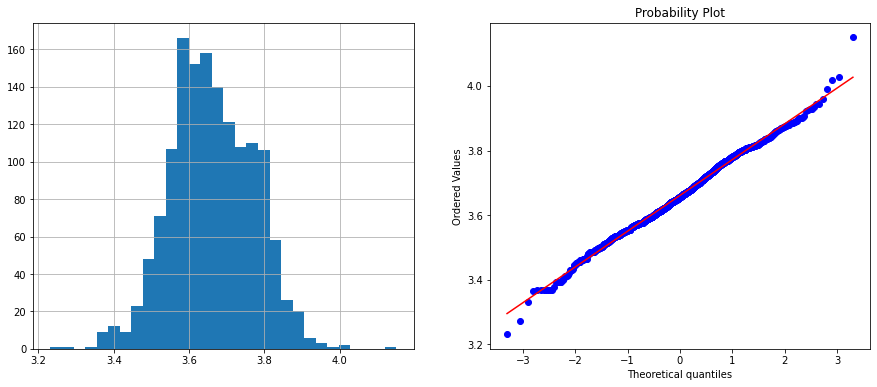

In [130]:
#Возведение в степень
data['1stFlrSF_exp1'] = data['1stFlrSF']**(1/1.5)
diagnostic_plots(data, '1stFlrSF_exp1')

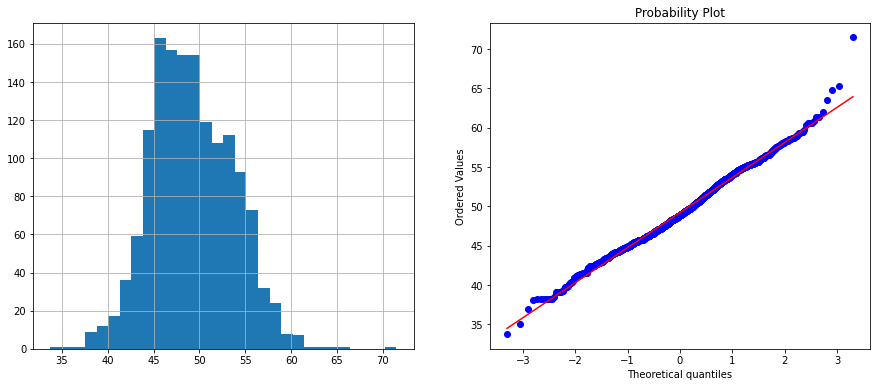

In [131]:
data['1stFlrSF_exp2'] = data['1stFlrSF']**(2)
diagnostic_plots(data, '1stFlrSF_exp2')

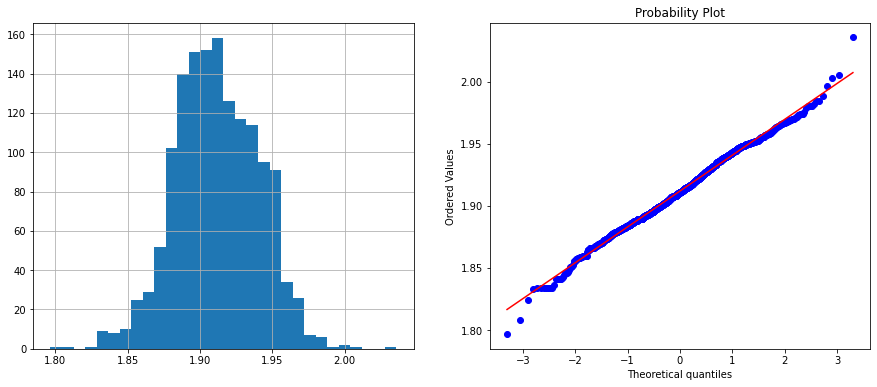

In [132]:
data['1stFlrSF_exp3'] = data['1stFlrSF']**(0.333)
diagnostic_plots(data, '1stFlrSF_exp3')

Оптимальное значение λ = 0.46304765872484194


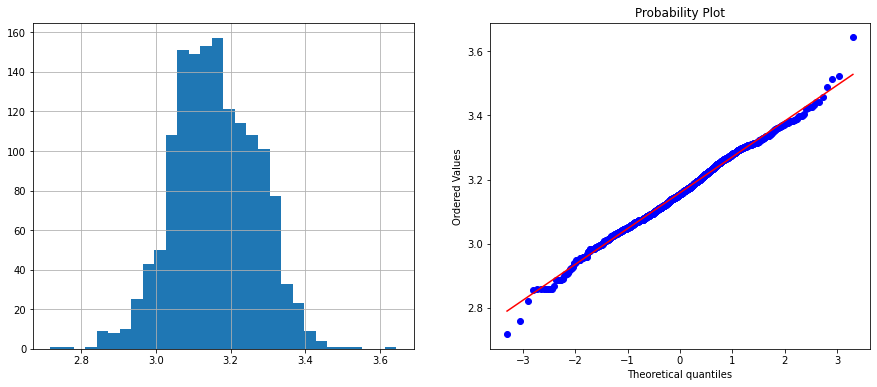

In [133]:
#Преобразованиея Бокса-Кокса
data['1stFlrSF_boxcox'], param = stats.boxcox(data['1stFlrSF']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, '1stFlrSF_boxcox')